# Signal Processing

The notebook goes into more detail on the processing of the 12 ECG data per patient. First, the signal itself is considered and then the ECG signal processing methods integrated in the 'wfdb' module are explored. Various approaches are then used to normalize the data and reduce noise in order to make the signals as comparable as possible.

In [40]:
from matplotlib import pyplot as plt
import wfdb.processing
import sys
import json

sys.path.append('../scripts')
import data_helper

## Load Data

For a better understanding of the structure and dimensions of the individual data sets, there are printed.

In [19]:
data = data_helper.load_data(only_demographic=False)

print("Number of patients per category:")
for cat_name in data.keys():
    print(f"{cat_name}: {len(data[cat_name])}")

Reading SB
Reading AFIB
Reading GSVT
Reading SR
SB: 16559
AFIB: 9839
GSVT: 948
SR: 9720


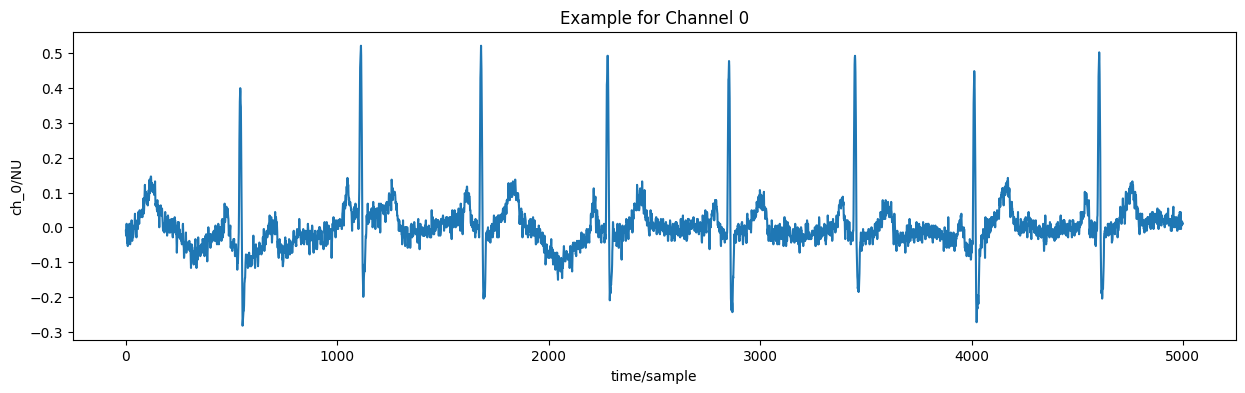

In [28]:
example_data = data['SB'][0]
#Plot specific Channel of Record
fig = wfdb.plot_items(example_data.p_signal[:,0],title="Example for Channel 0",figsize=(15,4),return_fig=True)

In [41]:
filter_params = {
    'names': ['butterlowpass', 'lowess', 'non_local_means'],
    # params for butterworth filter
    'order':1,
    'fs':500.0,
    'cutoff':25,
    # params for lowess filter
    'filter_strength':50,
    'template_window_size':7,
    'search_window_size':21,
    # params for nlm filter
    'frac':0.003,
    'it':1
}

#save filter params to json file
with open('../filter_params.json', 'w') as f:
    json.dump(filter_params, f)

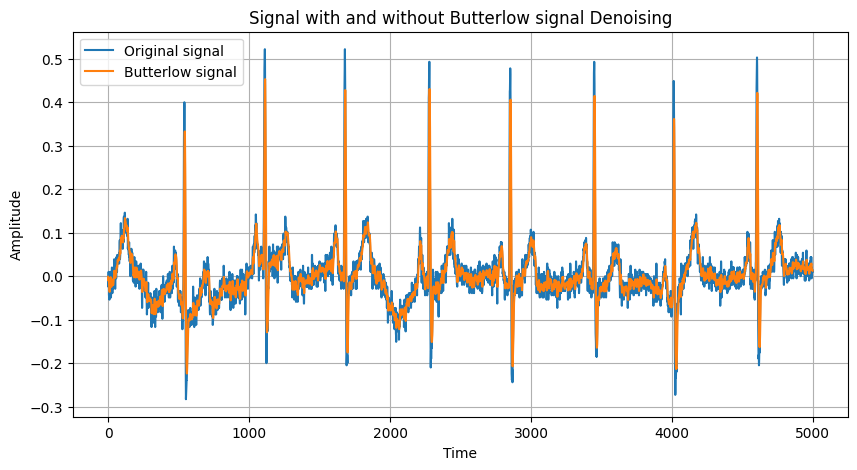

In [30]:
butter_filtered_sig = data_helper.butterlowpass_filter(example_data, filter_params['cutoff'], filter_params['fs'], filter_params['order'])
# Plot the original and denoised signal
plt.figure(figsize=(10, 5))
plt.plot(example_data.p_signal[:,0], label='Original signal')
plt.plot(butter_filtered_sig.p_signal[:,0], label='Butterlow signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with and without Butterlow signal Denoising')
plt.legend()
plt.grid(True)
plt.show()

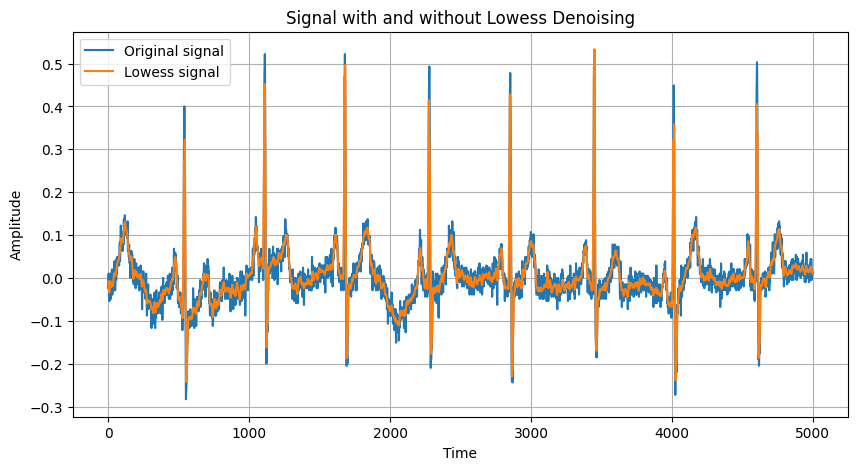

In [31]:
lowess_filtered_sig = data_helper.lowess_filter(example_data, filter_params['frac'], filter_params['it'])
# Plot the original and denoised signal
plt.figure(figsize=(10, 5))
plt.plot(example_data.p_signal[:,0], label='Original signal')
plt.plot(lowess_filtered_sig.p_signal[:,0], label='Lowess signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with and without Lowess Denoising')
plt.legend()
plt.grid(True)
plt.show()

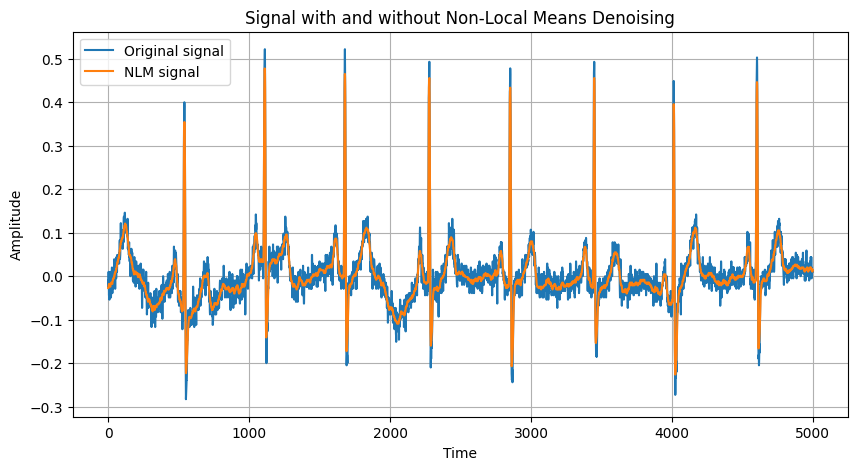

In [32]:
nlm_filtered_sig = data_helper.non_local_means_filter(example_data, filter_params['filter_strength'], filter_params['template_window_size'], filter_params['search_window_size'])
# Plot the original and denoised signal
plt.figure(figsize=(10, 5))
plt.plot(example_data.p_signal[:,0], label='Original signal')
plt.plot(nlm_filtered_sig.p_signal[:,0], label='NLM signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with and without Non-Local Means Denoising')
plt.legend()
plt.grid(True)
plt.show()

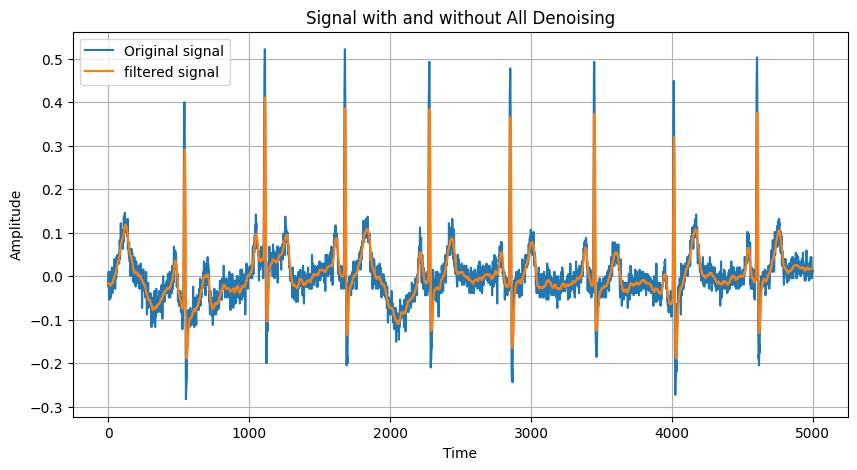

In [33]:
all_filtered_signals = data_helper.filter_data(example_data, filter_params)
# Plot the original and denoised signal
plt.figure(figsize=(10, 5))
plt.plot(example_data.p_signal[:,0], label='Original signal')
plt.plot(all_filtered_signals.p_signal[:,0], label='filtered signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with and without All Denoising')
plt.legend()
plt.grid(True)
plt.show()

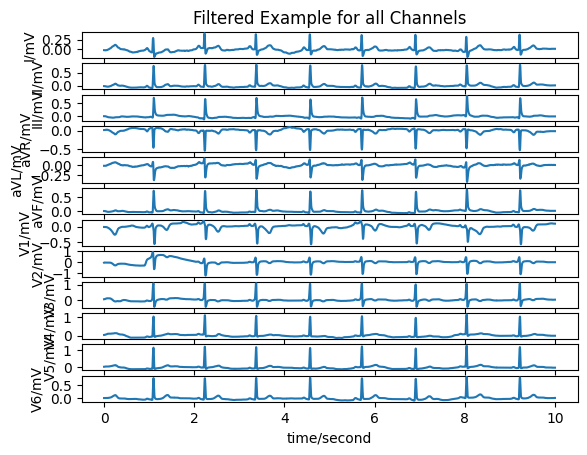

In [36]:
wfdb.plot_wfdb(all_filtered_signals,title="Filtered Example for all Channels")

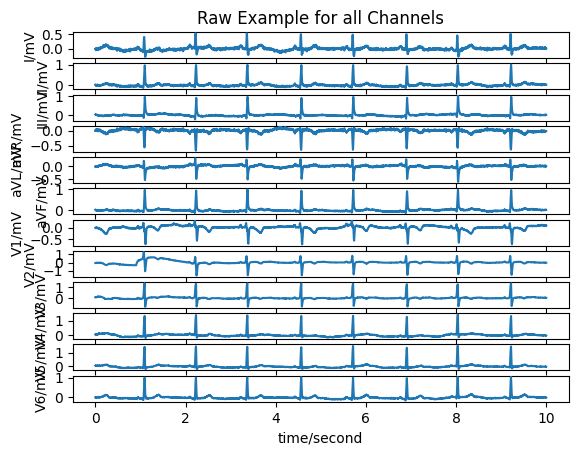

In [38]:
wfdb.plot_wfdb(example_data,title="Raw Example for all Channels")